Accès au fichier depuis le drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

def load_pkl(file):
  file = open(f'/content/drive/MyDrive/zoidberg/binary_images/{file}.pkl', 'rb')
  res = pickle.load(file)
  file.close()

  return res


#Preprocess

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os
from PIL import Image
from sklearn.tree import DecisionTreeClassifier

# Function to load, resize, and flatten images
def load_and_preprocess_images(folder_path, target_size=(224, 224)):
    images = []
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]

    for filename in image_files:
        img_path = os.path.join(folder_path, filename)
        try:
          with Image.open(img_path) as img:
            # Convert image to grayscale
                img = img.convert('L')
                img = img.resize(target_size)
                img_array = np.array(img)
                # Flatten the image
                img_array = img_array.flatten()
                images.append(img_array)
        except Exception as e:
          print(f"Error processing image {filename}: {e}")
    return images

neg_test_img = load_and_preprocess_images('/content/drive/MyDrive/zoidberg/chest_Xray/test/NORMAL')
pos_test_img = load_and_preprocess_images('/content/drive/MyDrive/zoidberg/chest_Xray/test/PNEUMONIA')

In [4]:
X_test = np.vstack([neg_test_img, pos_test_img])
y_test = np.hstack([np.zeros(len(neg_test_img)), np.ones(len(pos_test_img))])

In [5]:
X_train = load_pkl('train')
#X_test = load_pkl('test')
y_train = load_pkl('train_labels')
#y_test = load_pkl('test_labels')

#Implémentation du modèle

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.717948717948718


In [6]:
from sklearn import tree
from matplotlib import pyplot as plt

[Text(0.6795260847107438, 0.9833333333333333, 'x[48385] <= 0.5\ngini = 0.382\nsamples = 5216\nvalue = [1341, 3875]'),
 Text(0.4706224173553719, 0.95, 'x[17778] <= 112.5\ngini = 0.5\nsamples = 2330\nvalue = [1171, 1159]'),
 Text(0.25400309917355374, 0.9166666666666666, 'x[44538] <= 122.5\ngini = 0.424\nsamples = 1274\nvalue = [885, 389]'),
 Text(0.13429752066115702, 0.8833333333333333, 'x[115] <= 201.5\ngini = 0.457\nsamples = 387\nvalue = [137, 250]'),
 Text(0.0743801652892562, 0.85, 'x[33553] <= 57.5\ngini = 0.323\nsamples = 281\nvalue = [57, 224]'),
 Text(0.04132231404958678, 0.8166666666666667, 'x[8980] <= 61.5\ngini = 0.482\nsamples = 52\nvalue = [31, 21]'),
 Text(0.024793388429752067, 0.7833333333333333, 'x[33903] <= 70.0\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.01652892561983471, 0.75, 'x[14061] <= 68.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.008264462809917356, 0.7166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.024793388429752067

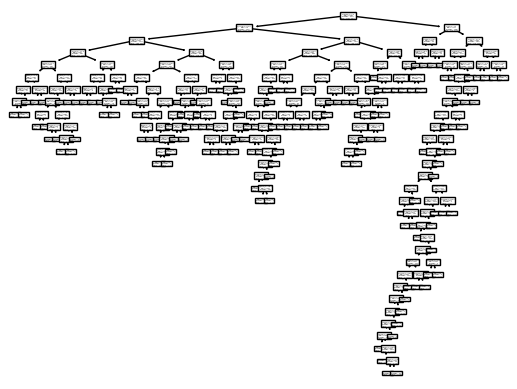

In [ ]:
tree.plot_tree(clf)

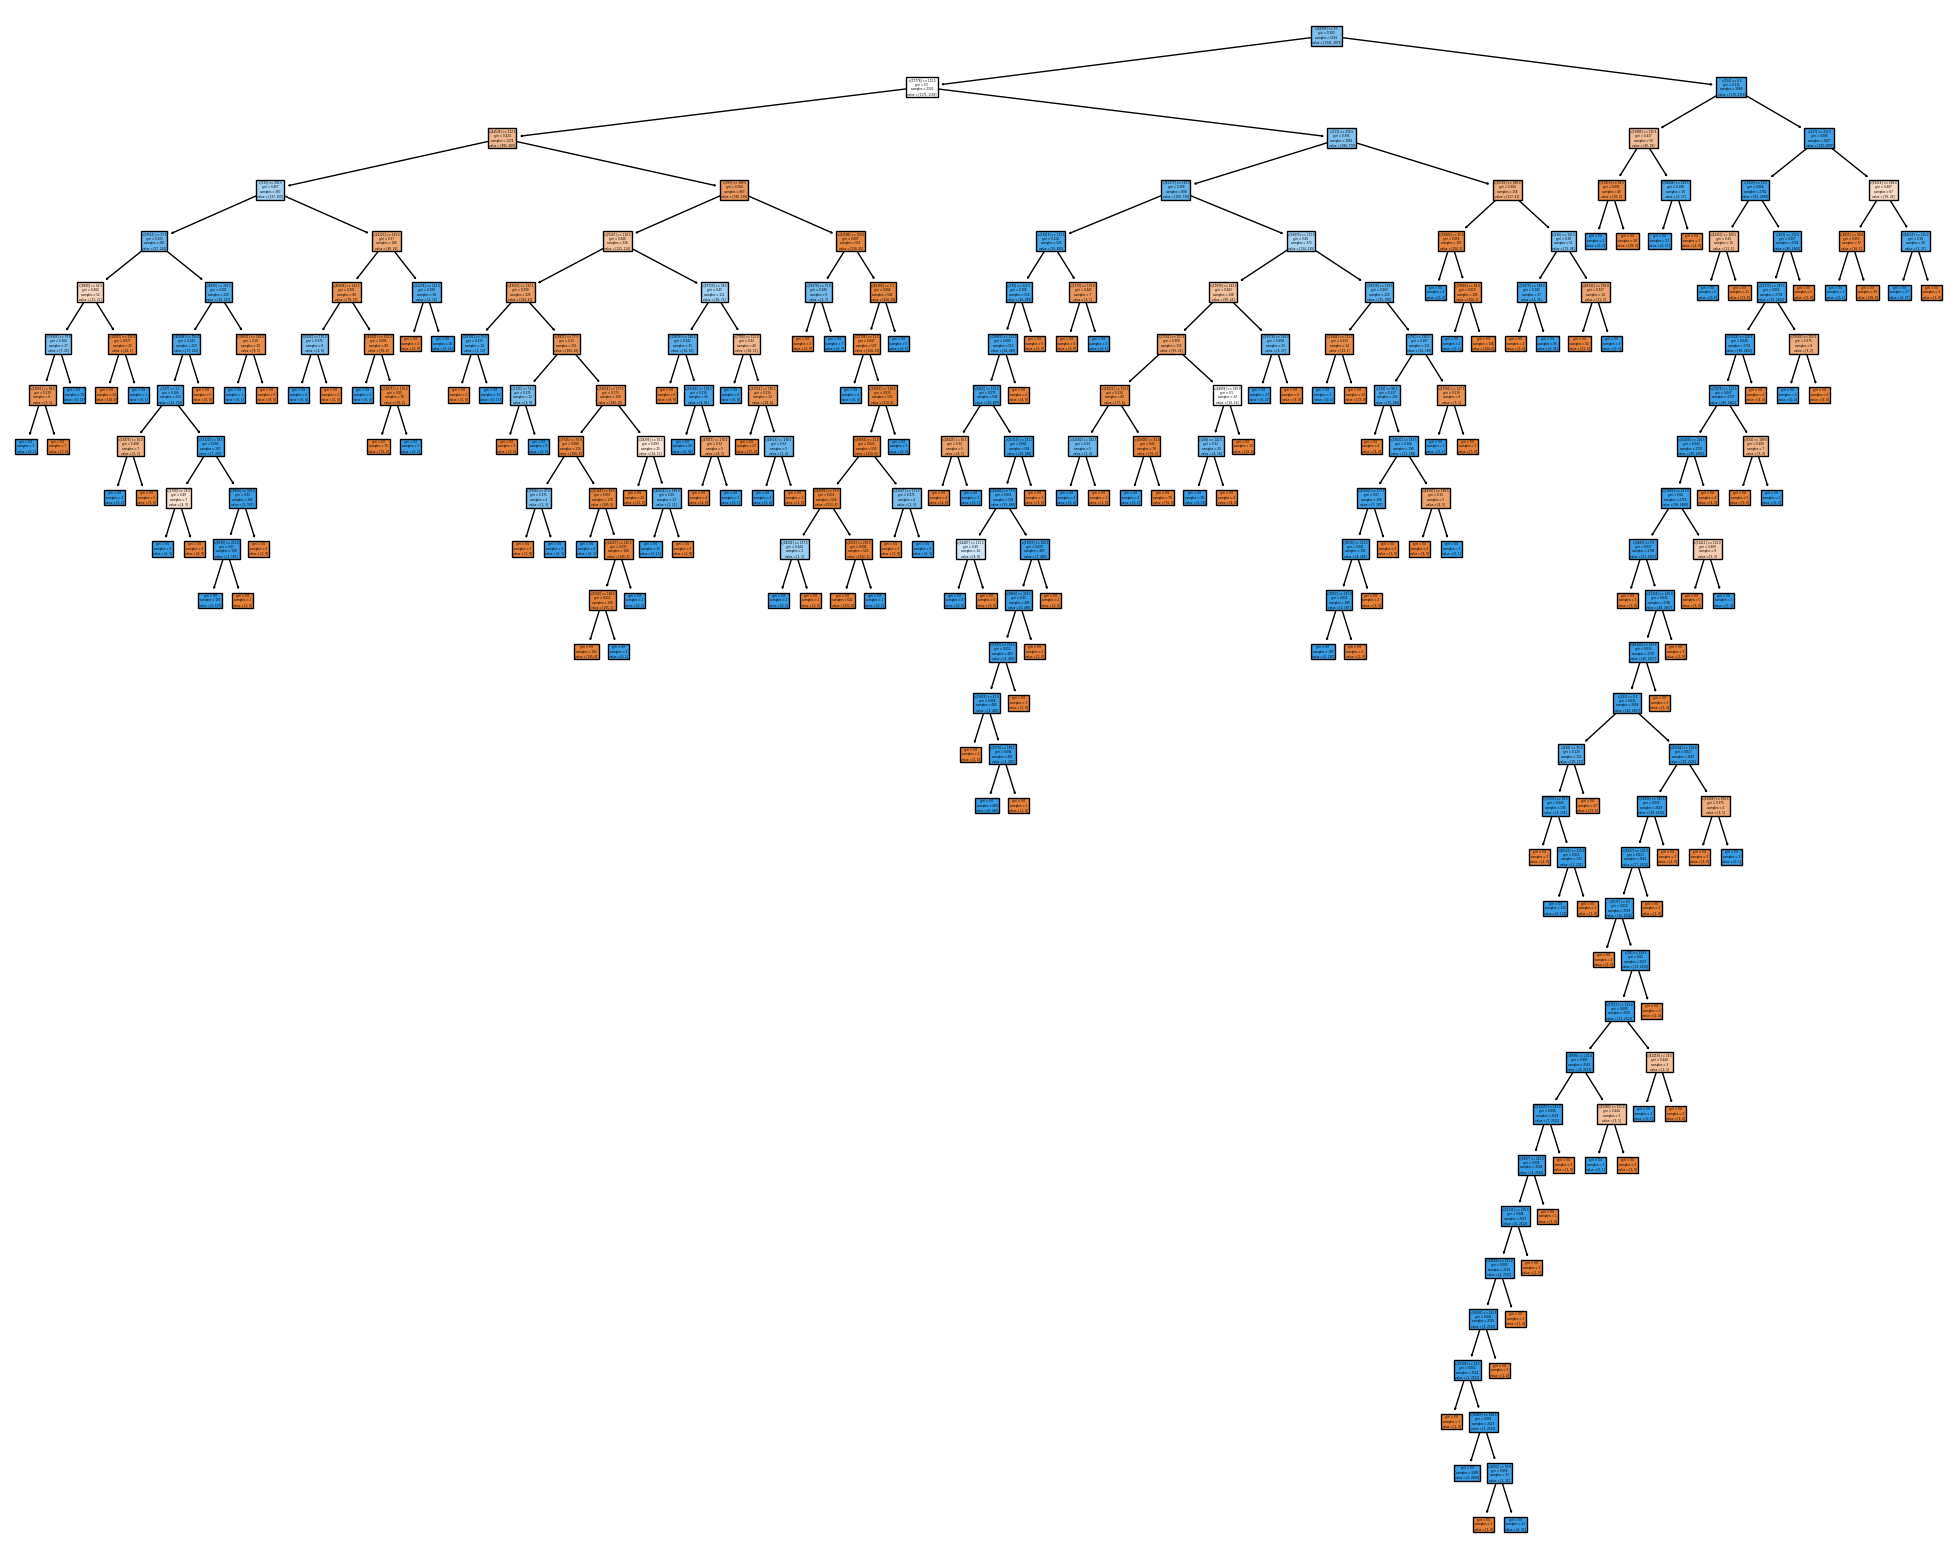

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   filled=True)

L'arbre de décision est très profond malgré sa performance relativement basse (Accuracy: 0.717948717948718)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7339743589743589


Meilleur performance en changeant la fonction malgré une profondeur bien inférieure (Accuracy: 0.7339743589743589)

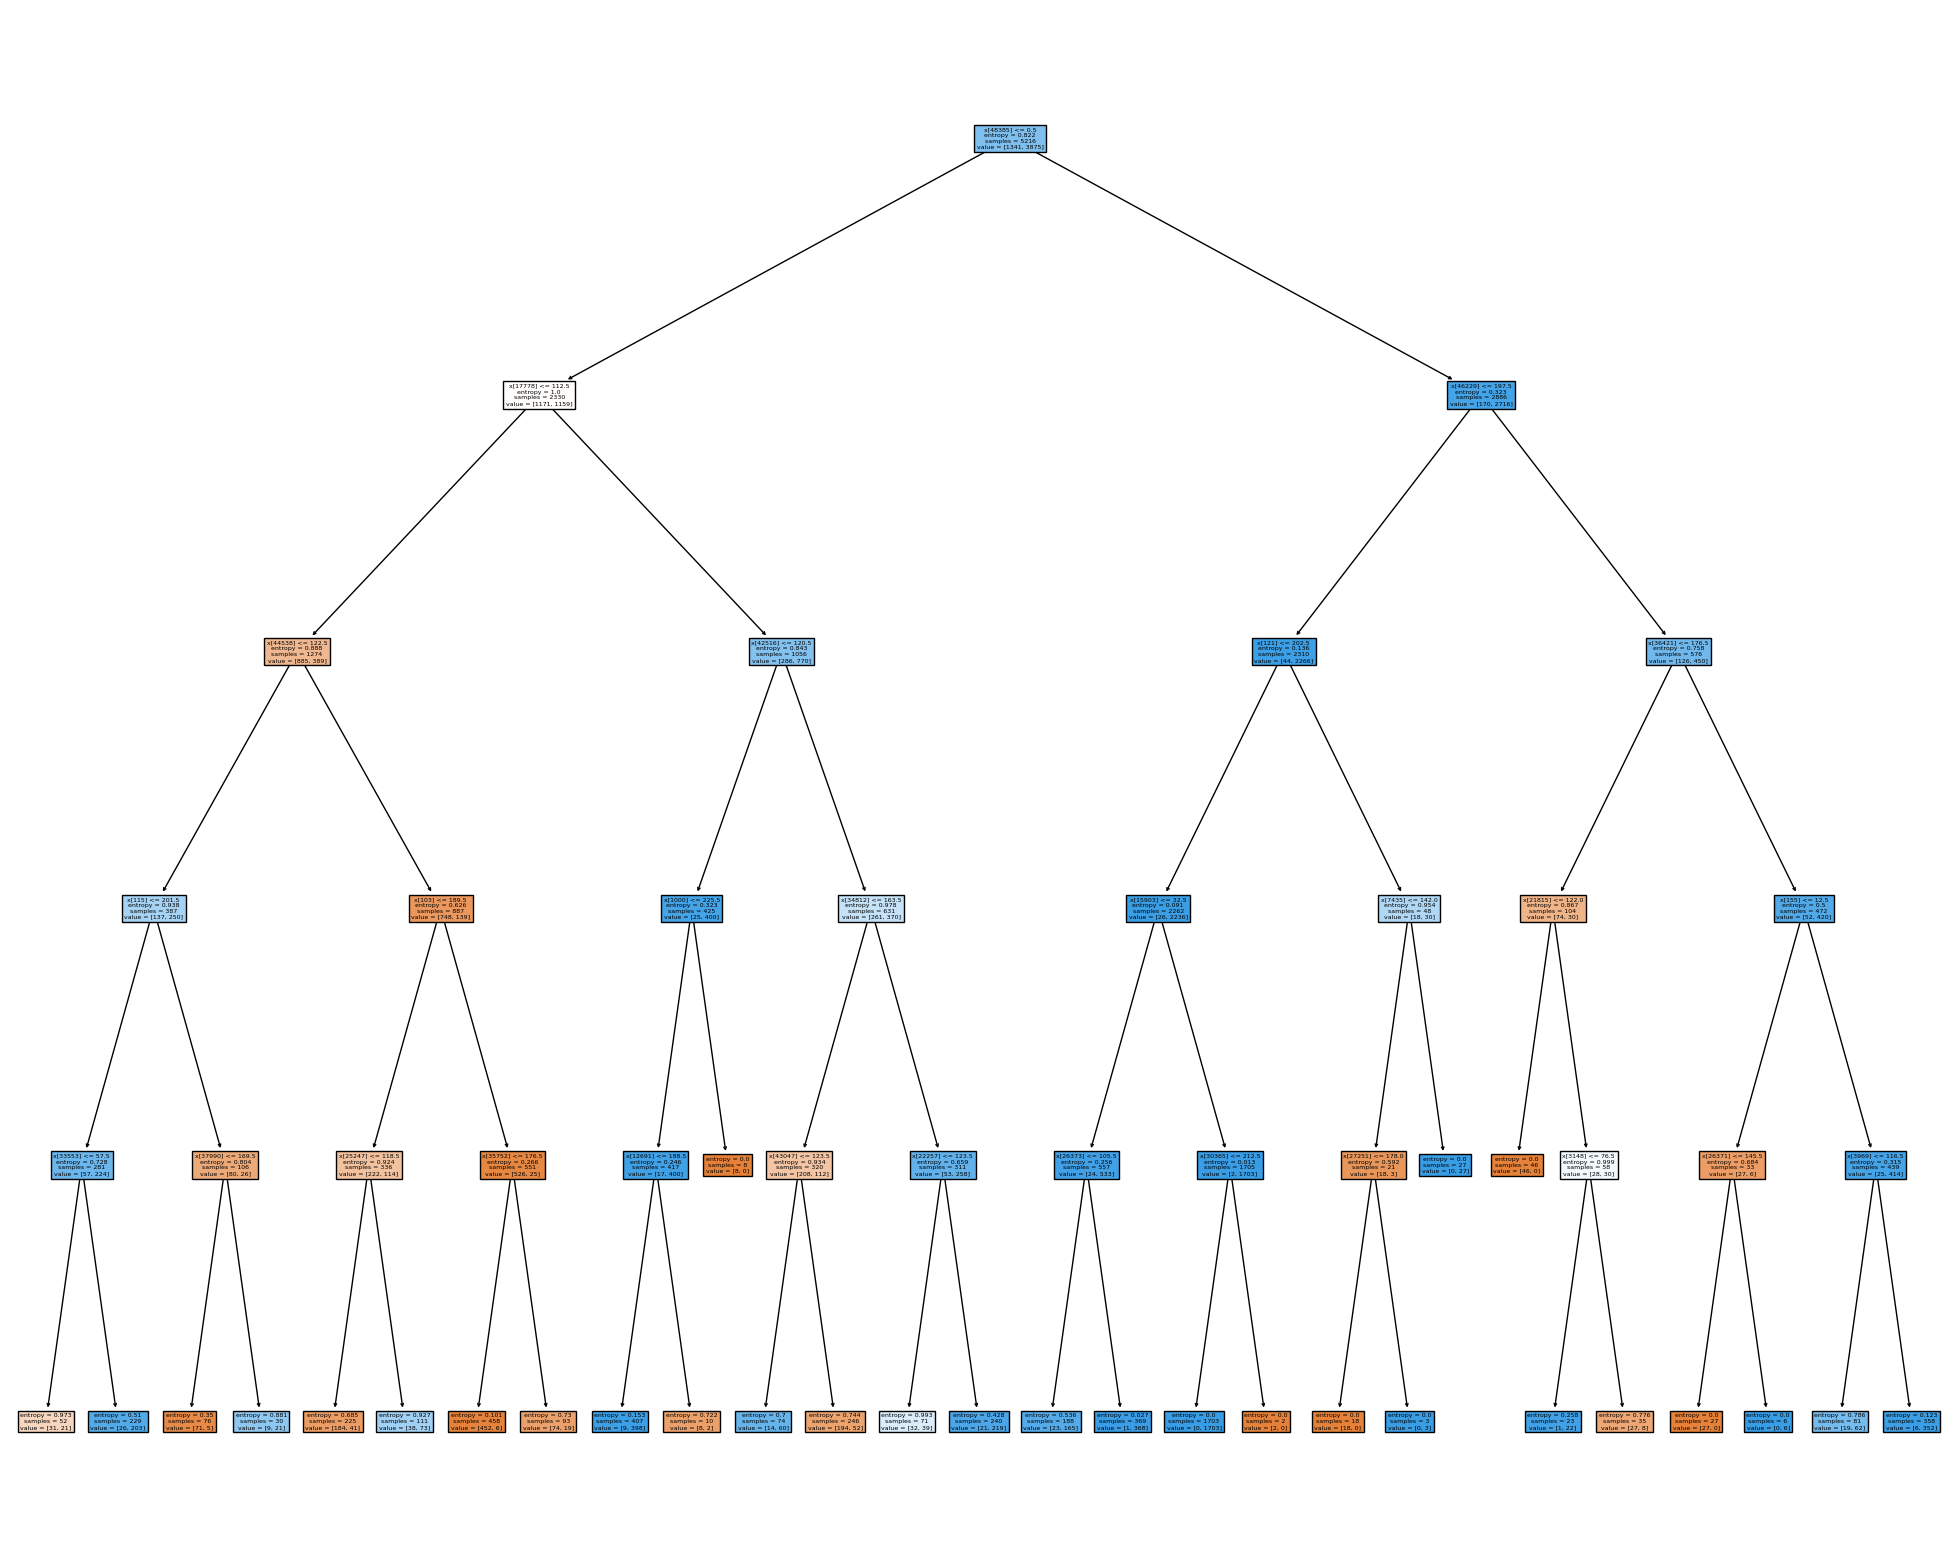

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   filled=True)

In [ ]:
clf2 = DecisionTreeClassifier(criterion="log_loss", max_depth=5)
clf2 = clf.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred2))

In [ ]:
param_grid = {
    'criterion': ['log_loss', "gini", "entropy"],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

results = grid_search.cv_results_

Best parameters: {'criterion': 'gini', 'max_depth': 7}
Best cross-validation accuracy: 0.8939731396685804


NameError: name 'X_test' is not defined

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

results = grid_search.cv_results_

Test set accuracy: 0.7051282051282052


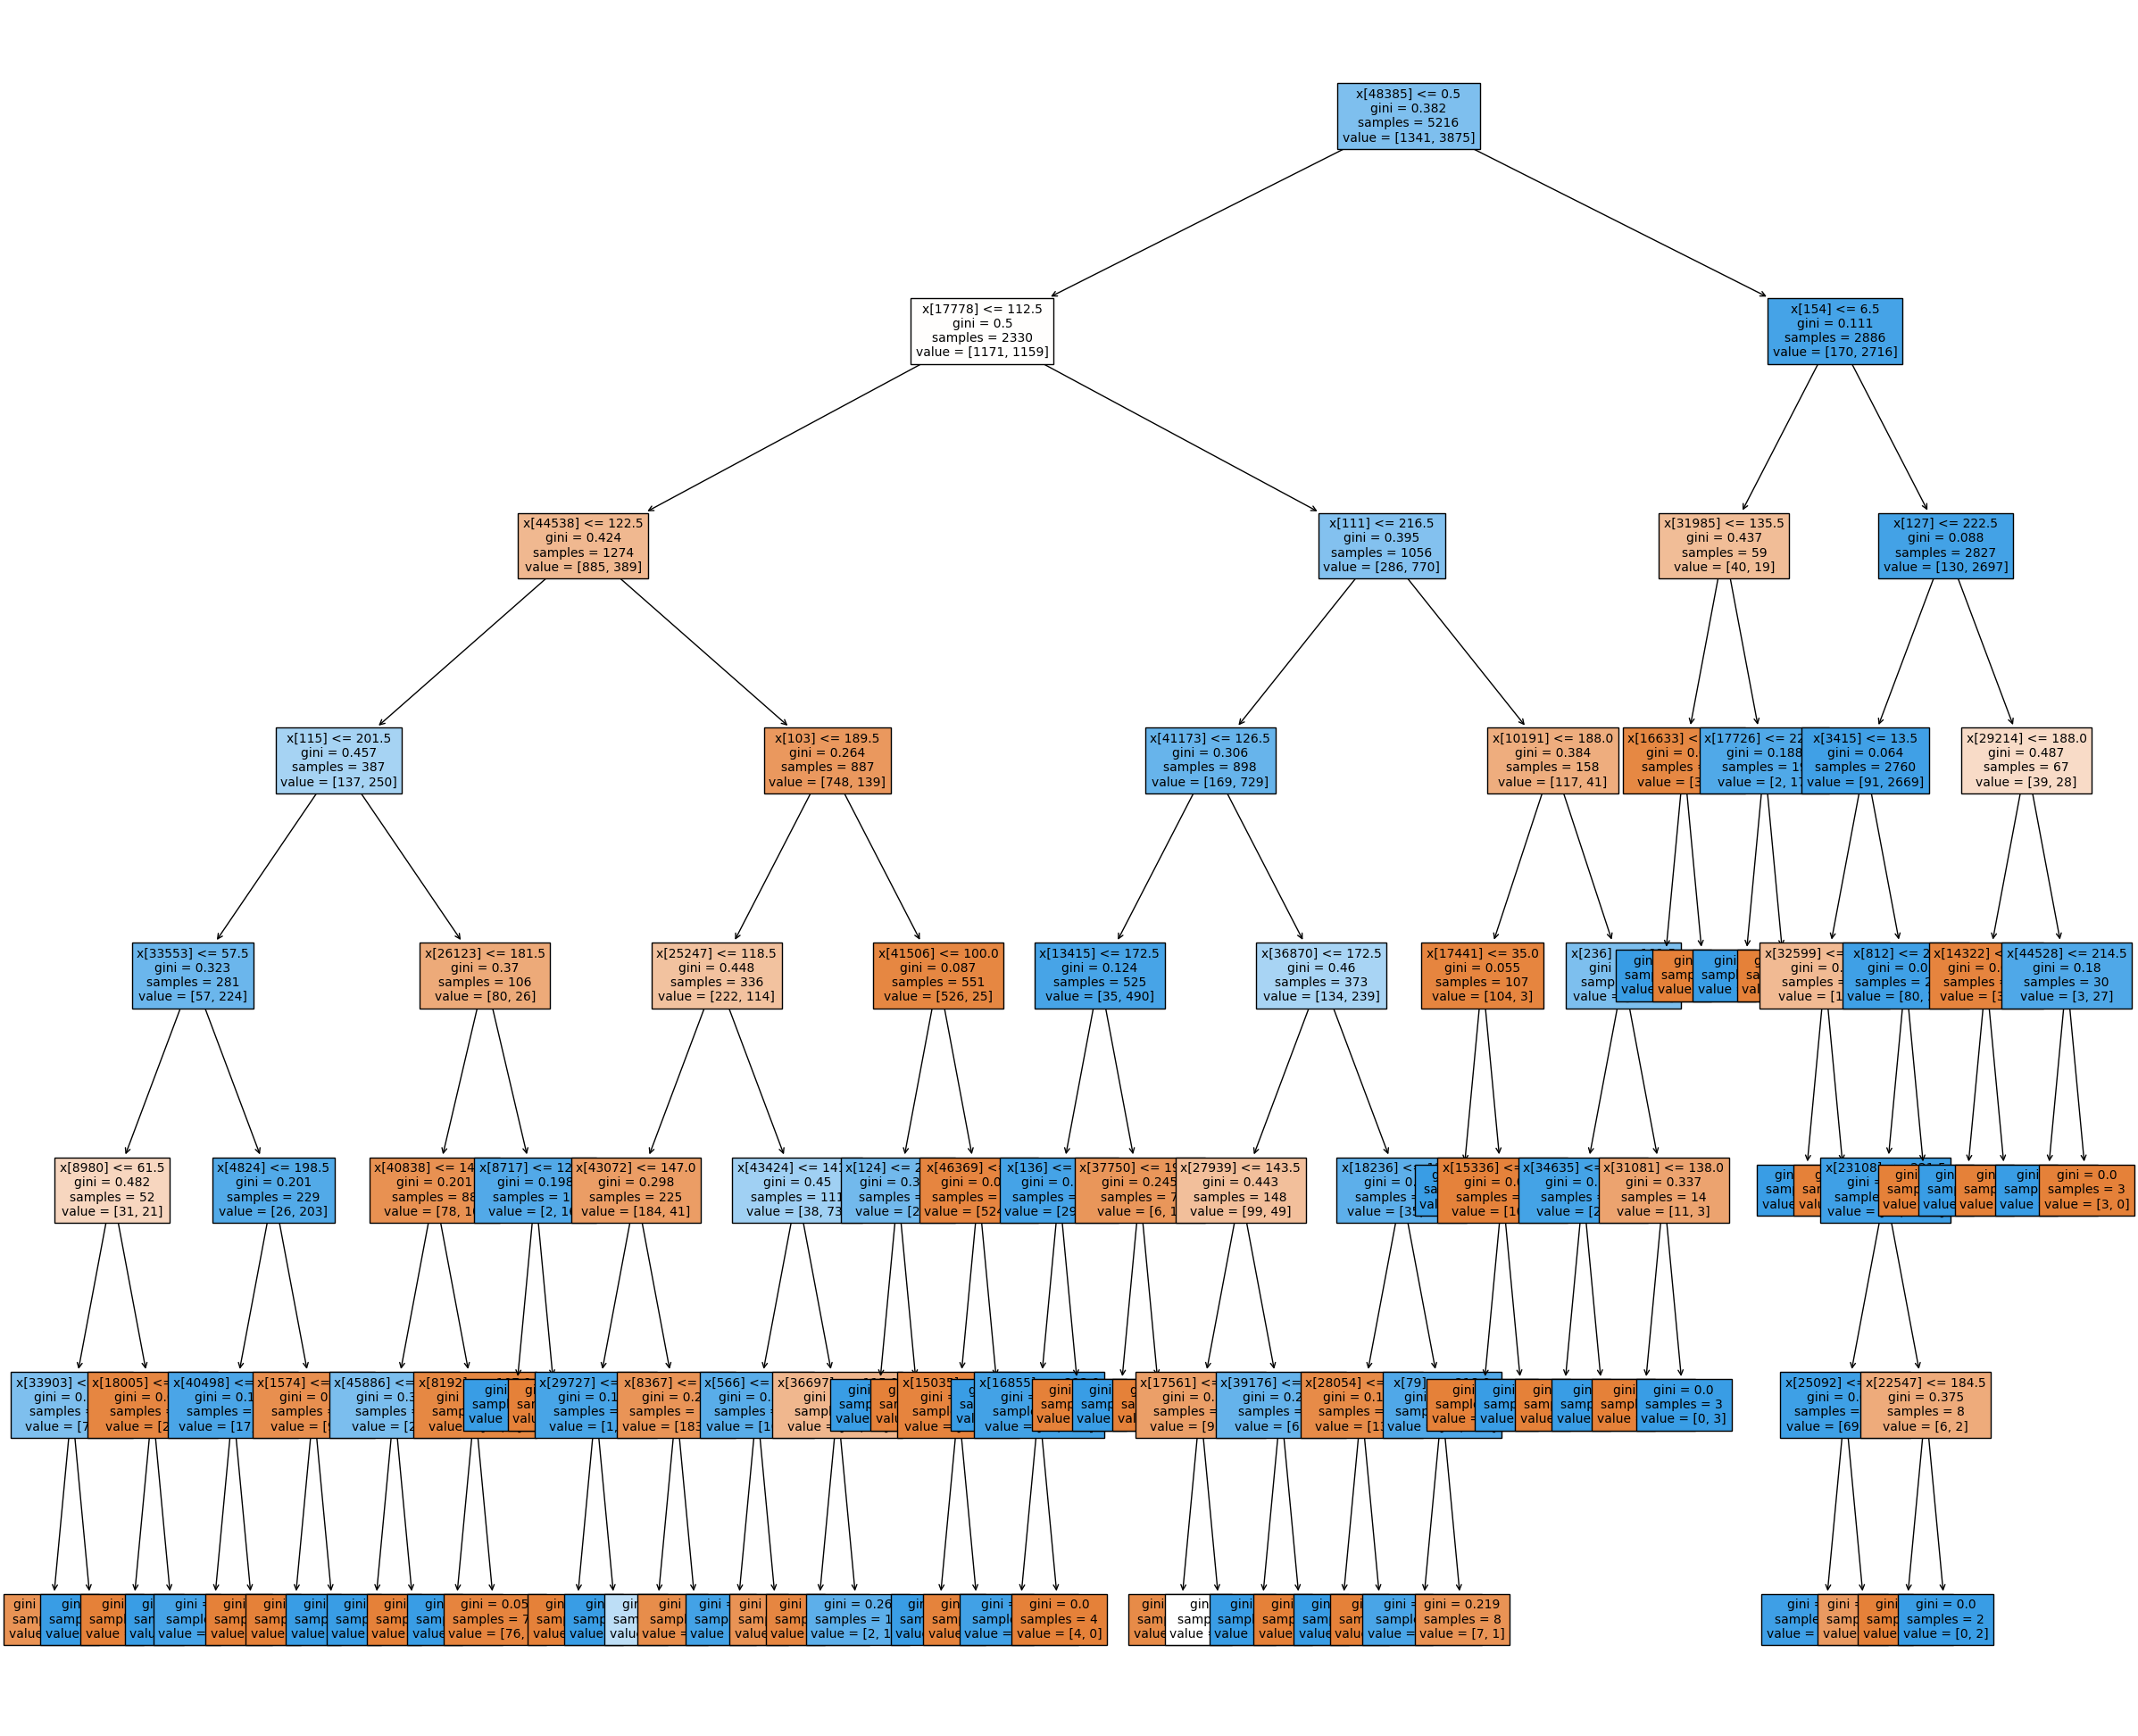

In [ ]:
fig = plt.figure(figsize=(30,25))  # Increase figure size
_ = tree.plot_tree(best_model,
                   filled=True,
                   fontsize=10)  # Increase font size
plt.show()